In [60]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier #63 84
from imblearn.ensemble import BalancedBaggingClassifier #69 74
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold
import shap
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
import catboost as cat
from scipy.stats import mstats
from scipy.stats.mstats import winsorize
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline


In [2]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


In [11]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-焦虑抑郁-人口学信息数据.csv"
data = pd.read_csv(fpath)
yincome = data['Yincome']

# 标记Yincome超出2个标准差的数据为异常 
anomalies = yincome[np.abs(yincome - yincome.mean()) > 2*yincome.std()]
anomalies_count = len(anomalies)  
print(f"异常值数量为:{anomalies_count}")
# # 将这些异常的数据标记为NaN
# data.loc[data['Yincome'].isin(anomalies), 'Yincome'] = np.nan
# # 填补缺失值(可选)
# data['Yincome'] = data['Yincome'].fillna(yincome.mean())  





异常值数量为:1


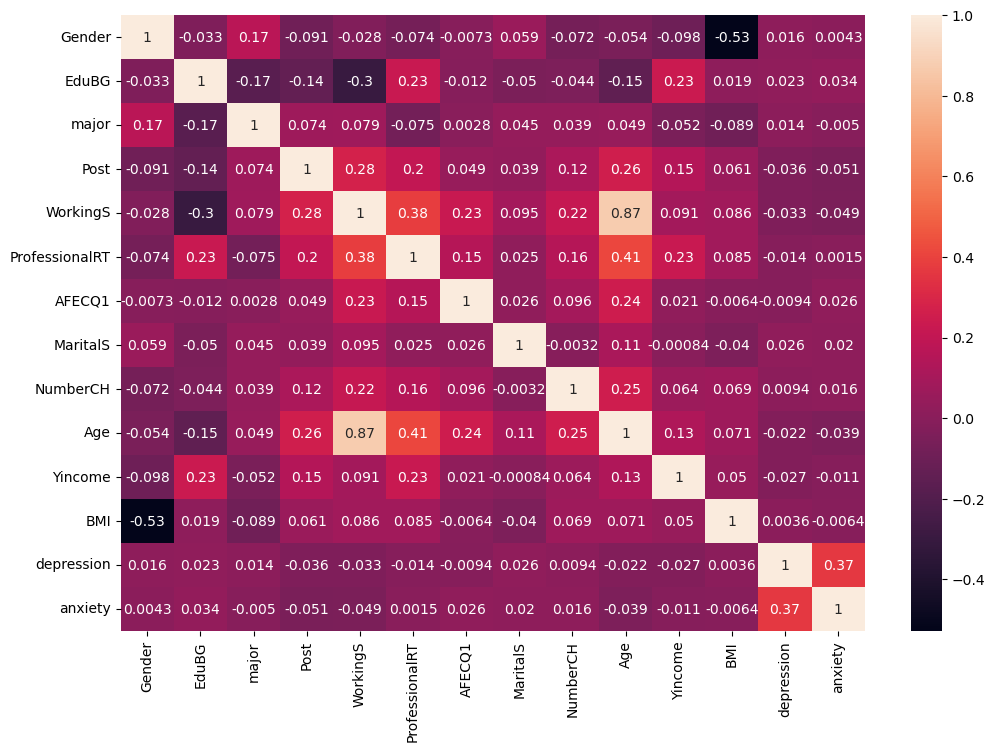

In [58]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-焦虑抑郁-人口学信息数据.csv"
Dataset = pd.read_csv(fpath)
corr_matrix = Dataset.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True)

plt.show()

train accuracy:0.78
Train Recall:  0.777513182514033
预测数据: Counter({0: 1288, 1: 1232})
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      1288
           1       0.53      0.54      0.53      1232

    accuracy                           0.54      2520
   macro avg       0.54      0.54      0.54      2520
weighted avg       0.54      0.54      0.54      2520

Recall: 0.54 Accuracy: 53.93


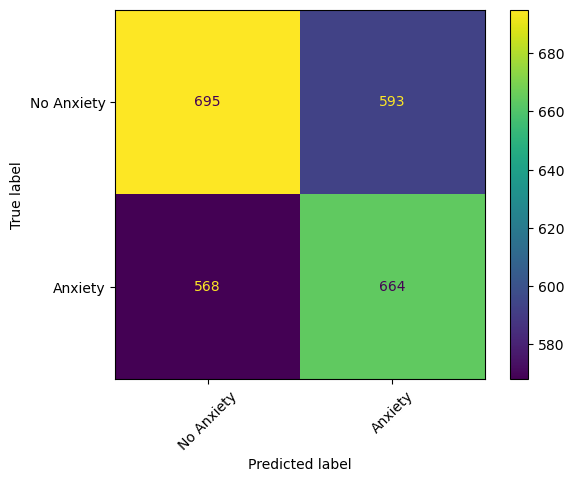

F1: 0.539342


In [75]:

# Load your data
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-焦虑抑郁-人口学信息数据.csv"
Dataset = pd.read_csv(fpath)
random_state=42
Dataset['Yincome'] = mstats.winsorize(Dataset['Yincome'], limits=[0.05, 0.05])
Dataset=Dataset.dropna()
y = Dataset['anxiety']
x = Dataset.drop(labels=['depression','anxiety'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

# brfc = RandomForestClassifier(n_estimators=100)
#,max_depth=50,,min_child_weight=10
brfc = xgb.XGBClassifier(learning_rate=0.05,n_estimators=200)

brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)

y_train_pred = brfc.predict(x_train)

accuracy = accuracy_score(y_test, y_pred)
print("train accuracy:%.2f" % accuracy_score(y_train,y_train_pred))

# 计算召回率
# 注意：由于你的模型是多分类模型，需要指定召回率的'average'参数
# 'micro': 计算全局的召回率
# 'macro': 计算每个类别的召回率然后取平均
# 'weighted': 计算每个类别的召回率然后取加权平均
recall = recall_score(y_train, y_train_pred, average='weighted')
print("Train Recall: ", recall)

print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))

# 绘制混淆矩阵
label_dict = {
    0: 'No Anxiety',
    1: 'Anxiety'
}

y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()
print('F1: %f' % f1)



count      2107.000000
mean     101728.168391
std       60609.259825
min       37206.600000
25%       62000.000000
50%       84010.000000
75%      122000.000000
max      540000.000000
Name: Yincome, dtype: float64


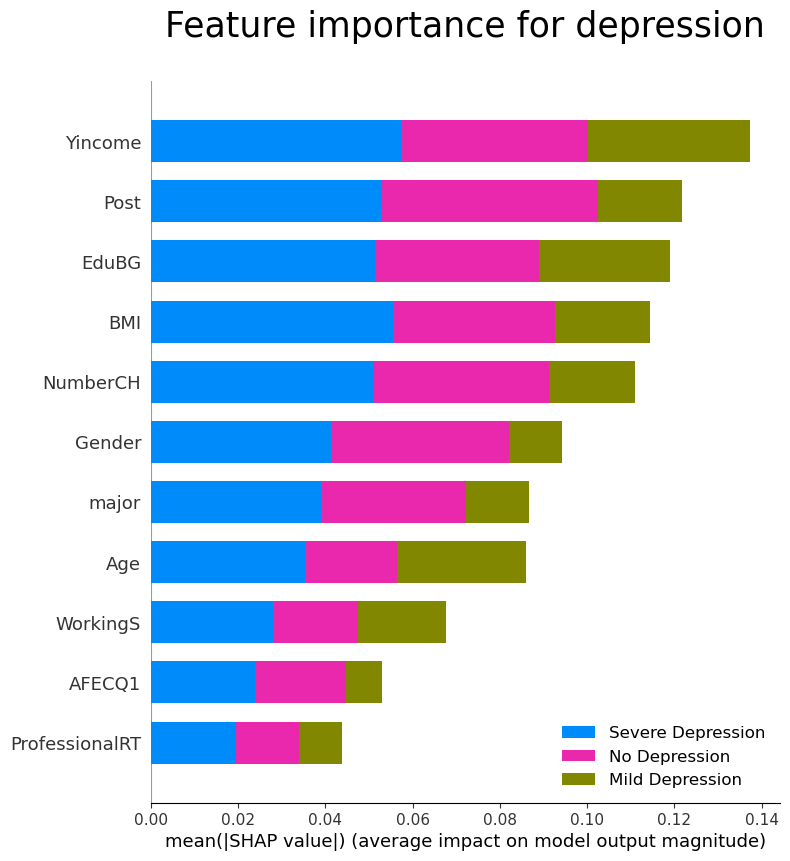

           feature  importance
10         Yincome    0.045782
3             Post    0.040559
1            EduBG    0.039666
11             BMI    0.038102
8         NumberCH    0.036961
0           Gender    0.031419
2            major    0.028892
9              Age    0.028690
4         WorkingS    0.022558
6           AFECQ1    0.017674
5   ProfessionalRT    0.014605
7         MaritalS    0.004909


In [43]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-焦虑抑郁-人口学信息数据.csv"
Dataset = pd.read_csv(fpath)
# filtered_Dataset = Dataset[(Dataset['Yincome'] >= 50000) & (Dataset['Yincome'] <= 200000)]

y = Dataset['depression']
x = Dataset.drop(labels=['depression','anxiety'], axis=1)

feature_names = np.array(x.columns)
names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

class_weights = {0: 30, 
                 1: 50, 
                 2: 100}
rfc = RandomForestClassifier(class_weight=class_weights,max_depth = 10, min_samples_leaf = 1, min_samples_split = 8, n_estimators = 100)

# weights = np.sum(y_train == 0) / np.sum(y_train == 1)
# rfc = xgb.XGBClassifier(learning_rate=0.01, objective='multi:softmax', num_class=3)

rfc.fit(x_train_resampled, y_train_resampled)
# 使用内联模式显示图像
%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)
class_names = [
    'No Depression',
    'Mild Depression',
    'Severe Depression'
]
print(x_test['Yincome'].describe())

# assuming model is trained, x_test dataset is defined, and shap_values have been calculated
# feature_name = 'AFECQ1'  # replace with your feature name
# shap.dependence_plot(feature_name, shap_values[1], x_test,interaction_index=None)

plt.subplots()
shap.summary_plot(shap_values, x_test, feature_names=feature_names, class_names=class_names,max_display=11,plot_size=(8, 8),show=False,plot_type="bar")
plt.title('Feature importance for depression', fontsize = 25, y = 1.05)
plt.show()
plt.close()
# Assuming that shap_values is a list of arrays, one per class
importances_per_class = []

for i in range(len(shap_values)):
    mean_shap_values_per_class = np.mean(np.abs(shap_values[i]), axis=0)
    importances_per_class.append(mean_shap_values_per_class)

# Now, importances_per_class is a list of arrays, each array represents the feature importances for a class
overall_importances = np.mean(importances_per_class, axis=0)
feature_importances = pd.DataFrame(list(zip(feature_names, overall_importances)),
                                   columns=['feature','importance'])

# Sort the DataFrame by importance in descending order
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

print(feature_importances)



重采样后的类别分布： Counter({2: 2312, 1: 2049, 0: 1441})
预测数据: Counter({0: 1740, 1: 324, 2: 43})
              precision    recall  f1-score   support

           0       0.84      0.56      0.67      1740
           1       0.18      0.37      0.24       324
           2       0.02      0.12      0.03        43

    accuracy                           0.52      2107
   macro avg       0.34      0.35      0.31      2107
weighted avg       0.72      0.52      0.59      2107

Recall: 0.52 Accuracy: 52.16


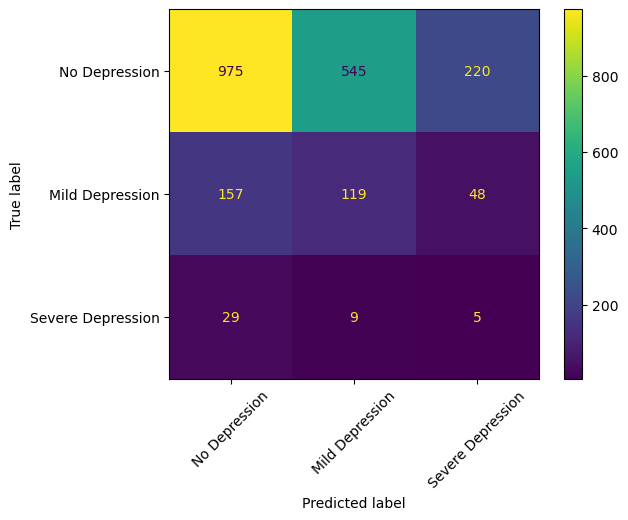

F1:  0.521594684385382


In [42]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-焦虑抑郁-人口学信息数据.csv"
data = pd.read_csv(fpath)
random_state=42
y = data['depression']
x = data.drop(labels=['depression','anxiety'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

# 组合采样
smote = SMOTEENN(random_state=random_state)
# smote = SMOTE(sampling_strategy='minority')
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))

# Assign class weights inversely proportional to class frequencies
class_weights = {0: 30, 
                 1: 50, 
                 2: 100}
model = RandomForestClassifier(class_weight=class_weights,max_depth = 10, min_samples_leaf = 1, min_samples_split = 8, n_estimators = 100)
# model = xgb.XGBClassifier(learning_rate=0.01, objective='multi:softmax', num_class=3,n_estimators=100)

# for i, val in enumerate(y_train):
#     w_array[i] = class_weights[val]
# model = xgb.XGBClassifier(scale_pos_weight=w_array,objective='multi:softprob', num_class=len(set(y)))
model.fit(x_train_resampled, y_train_resampled)

# Make predictions and evaluate
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵
label_dict = {
    0: 'No Depression',
    1: 'Mild Depression',
    2: 'Severe Depression'
}
y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()


print('F1: ', f1)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 5-fold cross-validation on the model

# cv_results = cross_validate(brfc,x_train_resampled, y_train_resampled, cv=5, scoring=scoring)

# # Print the average score for each metric
# print("Accuracy: ", cv_results['test_accuracy'].mean())
# print("Precision: ", cv_results['test_precision'].mean())
# print("Recall: ", cv_results['test_recall'].mean())
# print("F1 score: ", cv_results['test_f1'].mean())




train accuracy:1.00
Train Recall:  1.0
预测数据: Counter({0: 1104, 1: 1003})
              precision    recall  f1-score   support

           0       0.53      0.62      0.57      1104
           1       0.49      0.40      0.44      1003

    accuracy                           0.52      2107
   macro avg       0.51      0.51      0.51      2107
weighted avg       0.51      0.52      0.51      2107

Recall: 0.40 Accuracy: 51.73
F1: 0.511879


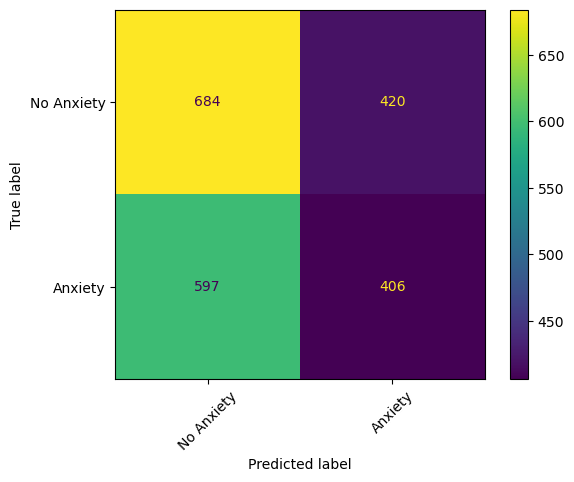

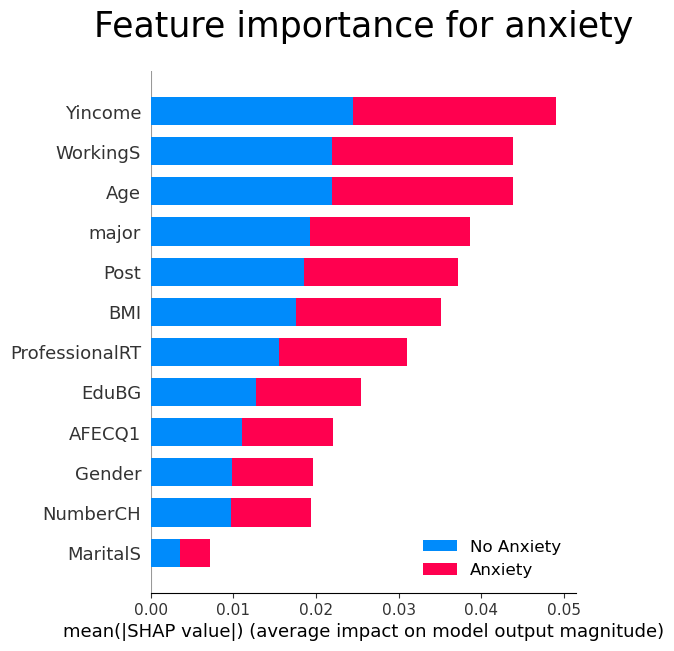

In [54]:

fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-焦虑抑郁-人口学信息数据.csv"
Dataset = pd.read_csv(fpath)
# selected_features = ['Yincome', 'Age', 'EduBG','AFECQ1','ProfessionalRT','WorkingS','anxiety']
# Dataset['Yincome'] = winsorize(Dataset['Yincome'], limits=[0.05, 0.05])

# corr_matrix = Dataset[selected_features].corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# sns.heatmap(corr_matrix, annot=True)
# scaler = StandardScaler()
# Dataset[['Yincome', 'Age','BMI']] = scaler.fit_transform(Dataset[['Yincome', 'Age','BMI']])
random_state=42
y = Dataset['anxiety']
x = Dataset.drop(labels=['depression','anxiety'], axis=1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

brfc = RandomForestClassifier(n_estimators=100)
# brfc = xgb.XGBClassifier(learning_rate=0.05,max_depth=100,n_estimators=300,min_child_weight=10)

brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)

y_train_pred = brfc.predict(x_train)

accuracy = accuracy_score(y_test, y_pred)
print("train accuracy:%.2f" % accuracy_score(y_train,y_train_pred))

# 计算召回率
# 注意：由于你的模型是多分类模型，需要指定召回率的'average'参数
# 'micro': 计算全局的召回率
# 'macro': 计算每个类别的召回率然后取平均
# 'weighted': 计算每个类别的召回率然后取加权平均
recall = recall_score(y_train, y_train_pred, average='weighted')
print("Train Recall: ", recall)

print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))

# 绘制混淆矩阵
label_dict = {
    0: 'No Anxiety',
    1: 'Anxiety'
}

y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
print('F1: %f' % f1)
feature_names = np.array(x.columns)

importances = brfc.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

explainer = shap.Explainer(brfc)
shap_values = explainer.shap_values(x_test)

class_names = [
     'No Anxiety',
     'Anxiety'
]
#plot_type="bar"
plt.subplots()
shap.summary_plot(shap_values, x_test, feature_names=feature_names, class_names=class_names,max_display=20,plot_size=(6, 6),show=False,plot_type="bar")
plt.title('Feature importance for anxiety', fontsize = 25, y = 1.05)

plt.show()



预测数据: Counter({0: 1626, 1: 1421})
              precision    recall  f1-score   support

           0       0.56      0.64      0.59      1626
           1       0.50      0.42      0.46      1421

    accuracy                           0.53      3047
   macro avg       0.53      0.53      0.52      3047
weighted avg       0.53      0.53      0.53      3047

Recall: 0.42 Accuracy: 53.43


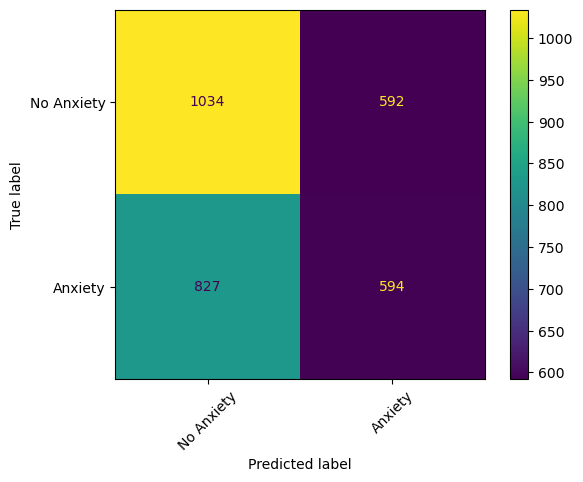

F1: 0.528999


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your data
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-焦虑抑郁-人口学信息数据.csv"
Dataset = pd.read_csv(fpath)
random_state=42
y = Dataset['anxiety']
x = Dataset.drop(labels=['depression','anxiety'], axis=1)


# Specify which columns are categorical and which are continuous
# categorical_cols = ['Gender', 'EduBG', 'major','Post','ProfessionalRT','AFECQ1','MaritalS'] # replace with your categorical column names
# continuous_cols = ['WorkingS', 'NumberCH', 'BMI','Age','Yincome'] # replace with your continuous column names

# # Define preprocessing pipelines for both types of variables
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# continuous_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())])

# # Combine both pipelines into a ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', continuous_transformer, continuous_cols),
#         ('cat', categorical_transformer, categorical_cols)])

# Define your model
model = RandomForestClassifier()

# Create a pipeline that first preprocesses the data, then fits the model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

# Split your data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train your model
clf.fit(X_train, y_train)

# Now your model is trained, and you can use it to make predictions
y_pred = clf.predict(X_test)


print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))

# 绘制混淆矩阵
label_dict = {
    0: 'No Anxiety',
    1: 'Anxiety'
}

y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()
print('F1: %f' % f1)



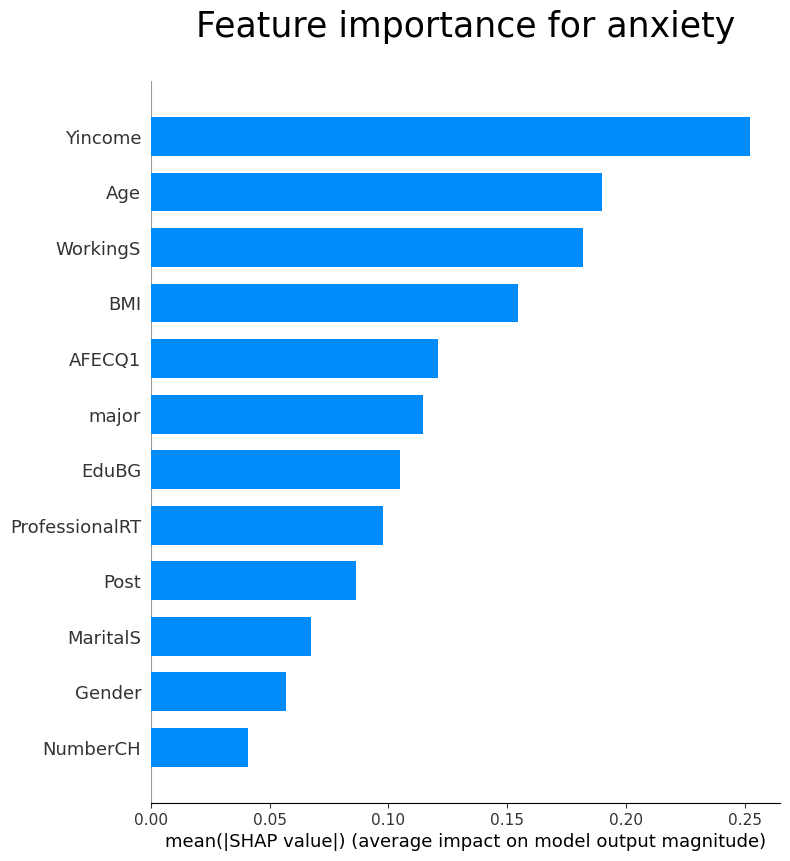

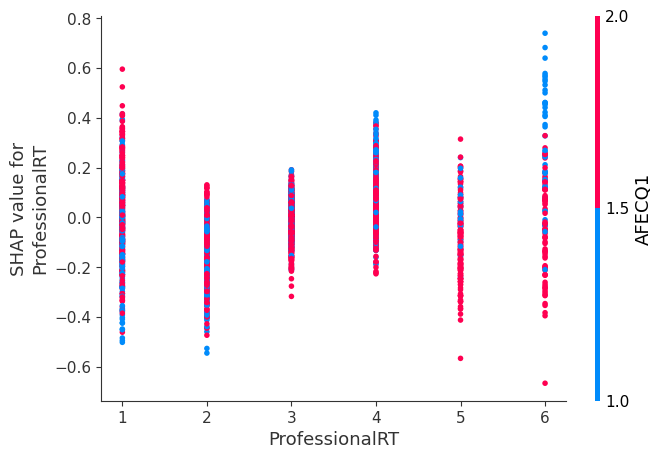

In [44]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-焦虑抑郁-人口学信息数据.csv"
Dataset = pd.read_csv(fpath)
Dataset['Yincome'] = winsorize(Dataset['Yincome'], limits=[0.05, 0.05])

random_state=42
y = Dataset['anxiety']
x = Dataset.drop(labels=['depression','anxiety'], axis=1)

feature_names = np.array(x.columns)
names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
weights = np.sum(y_train == 0) / np.sum(y_train == 1)
# rfc = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=2,min_samples_split=2,random_state=random_state)
# rfc = xgb.XGBClassifier(n_estimators=100,max_depth=6,scale_pos_weight=40,seed=1)
rfc = xgb.XGBClassifier(learning_rate=0.05,max_depth=100,n_estimators=300,min_child_weight=10)

rfc.fit(x_train, y_train)
# 使用内联模式显示图像
%matplotlib inline

explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(x_test)

class_names = [
     'No Anxiety',
     'Anxiety'
]
#plot_type="bar"
plt.subplots()
shap.summary_plot(shap_values, x_test, feature_names=feature_names, class_names=class_names,max_display=20,plot_size=(8, 8),show=False,plot_type="bar")
plt.title('Feature importance for anxiety', fontsize = 25, y = 1.05)

# choose a feature you are interested in
feature = "ProfessionalRT"  # replace this with your actual feature name
# create a dependence plot to show the effect of a specific feature across the whole dataset
shap.dependence_plot(feature, shap_values, x_test)
plt.show()
plt.close()



50000-100000       5194
100000-200000      2968
0-50000            2569
200000-10000000     657
1000000+             10
Name: Yincome_group, dtype: int64


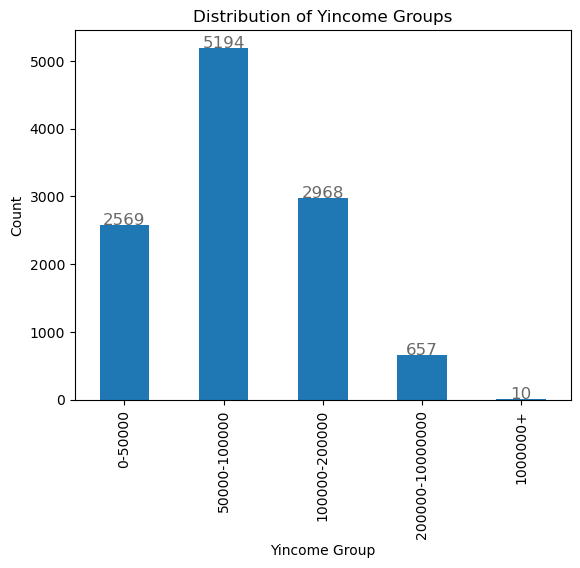

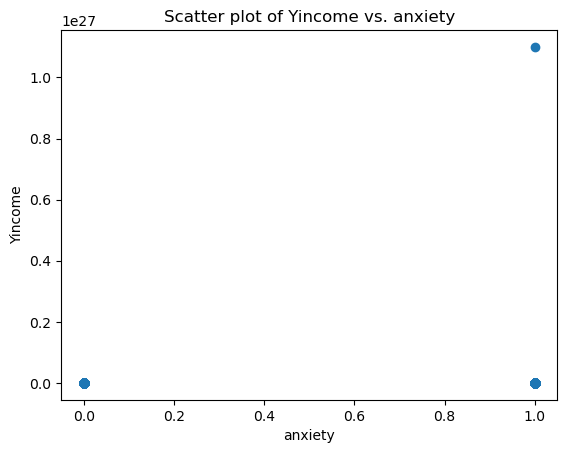

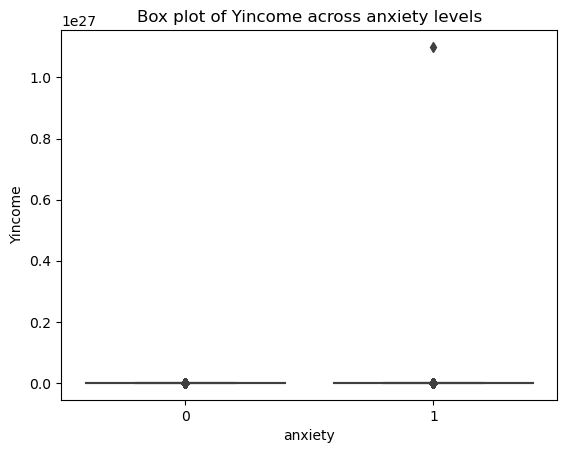

In [84]:

fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-焦虑抑郁-人口学信息数据.csv"
Dataset = pd.read_csv(fpath)
Dataset['Yincome'] = winsorize(Dataset['Yincome'], limits=[0.05, 0.05])
from keras.models import Sequential
from keras.layers import Dense

# 假设 X 和 y 是你的数据
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train,y_train, epochs=150, batch_size=10)

